# **1. 데이터 불러오기**

In [415]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/AI활용 소프트웨어 개발/11. 데이터분석/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI활용 소프트웨어 개발/11. 데이터분석/data/test.csv')

# **2. EDA**

In [416]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [417]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [418]:
train_df.info()

# 명목형 변수 5개, 숫자형(연속형)변수 7개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [419]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# **3. 전처리**

### **3_1 결측치 처리**

In [420]:
train_df.isna().sum()

# Age, Cabin, Embarked 변수에 결측치 존재

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [421]:
test_df.isna().sum()

# Age, Cabin 변수에 결측치 존재

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [422]:
# train데이터에 존재하는 Embarked의 결측치 2개 삭제
train_df = train_df.dropna(subset=['Embarked'])
train_df['Embarked'].isna().sum()

np.int64(0)

In [423]:
# test데이터에 존재하는 Fare의 결측치 1개 삭제
test_df = test_df.dropna(subset=['Fare'])
test_df['Fare'].isna().sum()

np.int64(0)

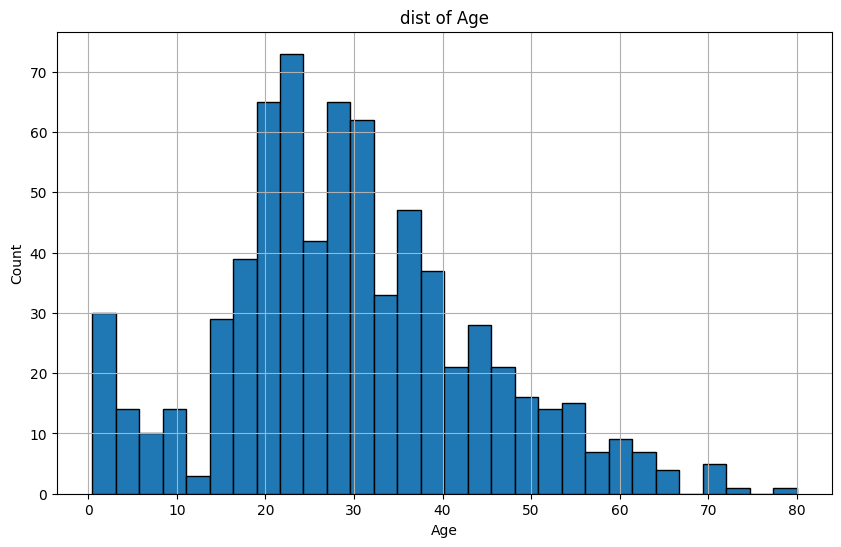

In [424]:
# Age 변수의 결측치 대체를 위해 시각화
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(train_df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('dist of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 유아, 청년층이 많음을 확인.

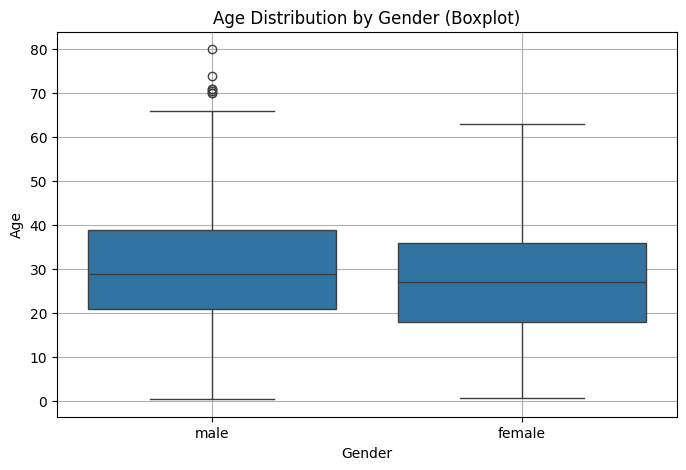

In [425]:
# 성별에 따른 나이 분포 확인
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Sex', y='Age')
plt.title('Age Distribution by Gender (Boxplot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# 남성과 여성 모두 중앙값과 IQR의 범위가 비슷하게 보이지만 여성 탑승객의 다소 어린 것을 확인할 수 있다.
# 즉, 많은 값이 상대적으로 낮은 나이에 몰려 있어 높은 나이 값이 길게 퍼져있는 (오른쪽으로 꼬리가 긴) 형태이다.
# 남성의 경우 이상치로 볼 수 있는 데이터를 확인할 수 있다.

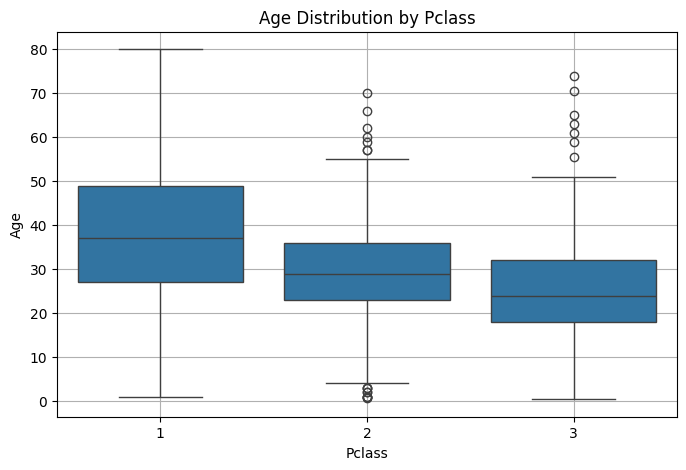

In [426]:
# 객실 등급에 따른 나이 분포 확인

plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# 나이의 중앙값이 1등석 > 2등석 > 3등석 순으로 크다.
# 즉, 이상치로 보이는 데이터가 다소 존재 하지만 대략적으로 나이가 높을 수록 고급 객실을 이용한 것을 확인할 수 있다.

In [427]:
print(train_df['Age'].mean())
print(train_df['Age'].median())

29.64209269662921
28.0


In [428]:
# 위의 시각화 결과를 토대로 Age 결측치를 Sex와 Pclass로 그룹화하여 중앙값으로 대체

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
# train_df.isna().sum()
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,326


In [429]:
# Cabin: 선실 위치
train_df['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [430]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [431]:
# Cabin은 활용하기 어렵다고 판단하여 삭제(Cabin 대신 Pclass변수 활용)
# Name은 식별자일 뿐 예측에 도움되지 않는다 판단하여 삭제.

train_df = train_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

### **범주형 변수 처리**

In [432]:
# 범주형 변수들의 nunique 확인

for i in ['Sex', 'Pclass', 'Embarked']:
    print(i, train_df[i].nunique())

Sex 2
Pclass 3
Embarked 3


In [433]:
train_df['Sex'].value_counts()

,count
Sex,
male,577
female,312


In [434]:
train_df['Pclass'].value_counts()

,count
Pclass,
3,491
1,214
2,184


In [435]:
# Embarked: 출발항
# S: 영국 /  C: 프랑스  /  Q: 아일랜드

train_df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


### **데이터 시각화**

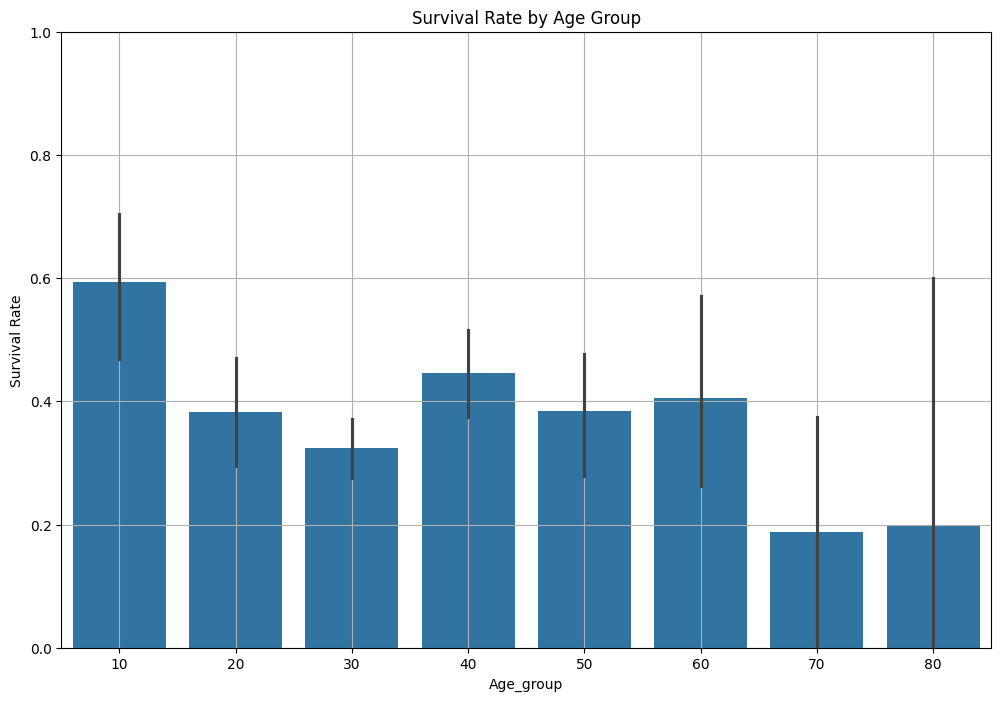

In [436]:
# 나이에 따른 생존률

import seaborn as sns

train_df['Age_group'] = pd.cut(train_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80],
                               labels=['10', '20', '30', '40', '50','60', '70','80'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Age_group', y='Survived', data=train_df)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [437]:
test_df['Age_group'] = pd.cut(test_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80],
                               labels=['10', '20', '30', '40', '50','60', '70','80'])

In [438]:
train_df = train_df.drop('Age', axis=1)
test_df = test_df.drop('Age', axis=1)

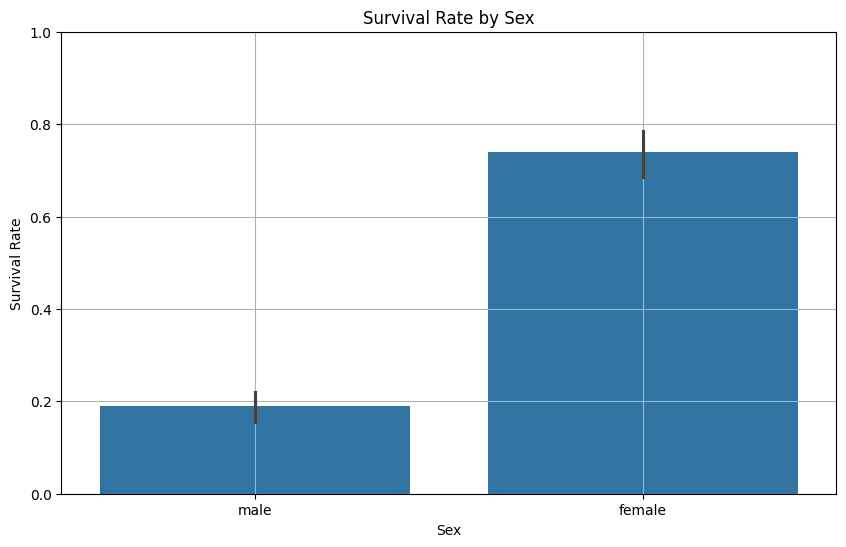

In [439]:
# 성별에 따른 생존률

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

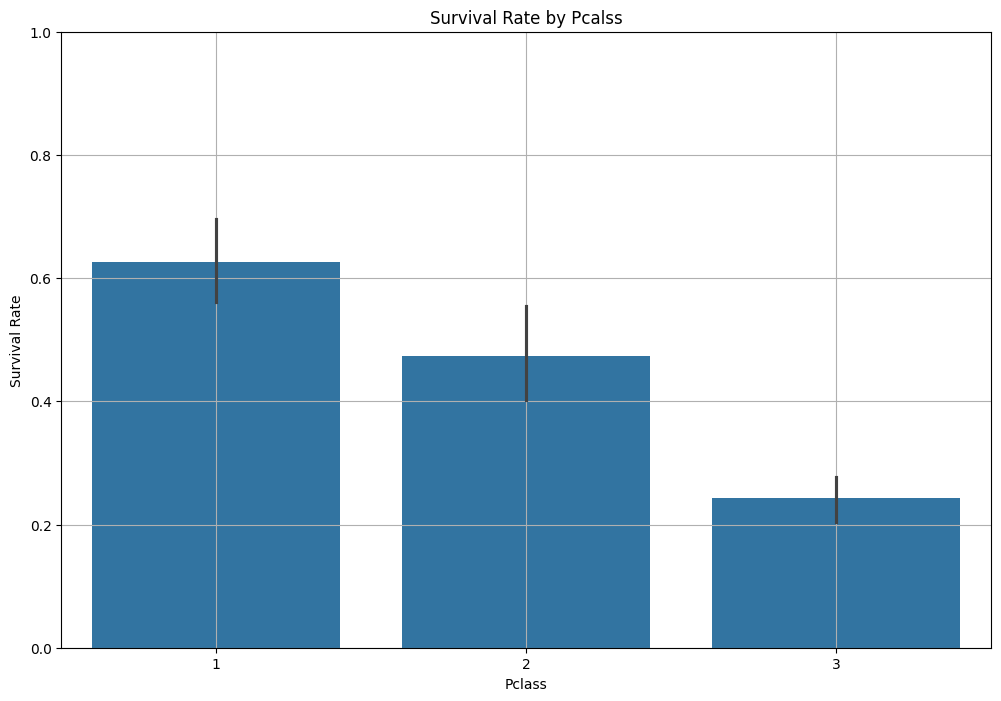

In [440]:
# 객실 등급에 따른 생존률

plt.figure(figsize=(12, 8))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pcalss')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

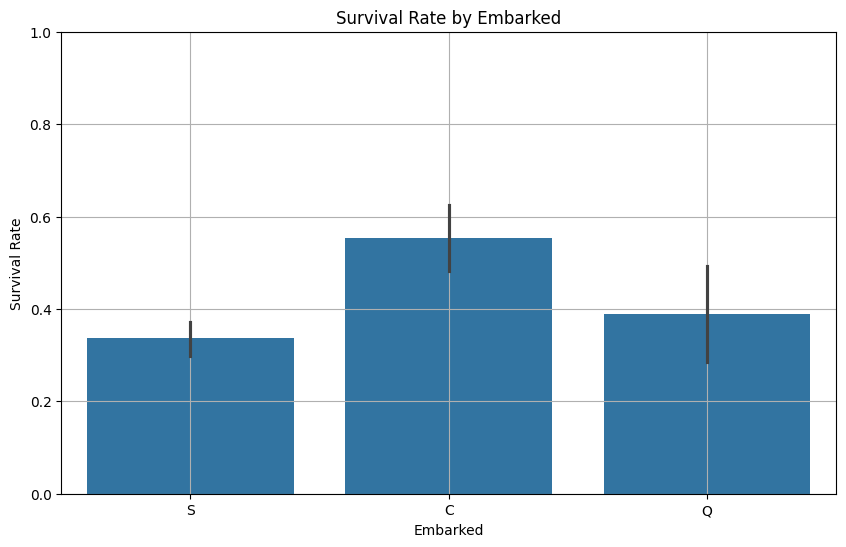

In [441]:
# 출발항에 따른 생존률
# C(프랑스)에서 탑승한 승객의 생존률이 가장 높다.

plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [442]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Age_group,0


In [443]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Age_group,0


### **타겟 옮기기**

In [444]:
target = train_df.pop("Survived")
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [445]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Pclass       889 non-null    int64   
 2   Sex          889 non-null    object  
 3   SibSp        889 non-null    int64   
 4   Parch        889 non-null    int64   
 5   Fare         889 non-null    float64 
 6   Embarked     889 non-null    object  
 7   Age_group    889 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 56.8+ KB


In [446]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  417 non-null    int64   
 1   Pclass       417 non-null    int64   
 2   Sex          417 non-null    object  
 3   SibSp        417 non-null    int64   
 4   Parch        417 non-null    int64   
 5   Fare         417 non-null    float64 
 6   Embarked     417 non-null    object  
 7   Age_group    417 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 26.8+ KB


### **원핫인코딩**

In [447]:
print(train_df.shape, test_df.shape)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df,  columns=['Sex', 'Embarked'])
print(train_df.shape, test_df.shape)

(889, 8) (417, 8)
(889, 11) (417, 11)


# **4. 검증데이터 나누기**

In [448]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(train_df, target, test_size=0.2, random_state=2025)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(711, 11) (178, 11) (711,) (178,)


# **5. 모델 학습 및 평가**

**랜덤포레스트**

In [449]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

# macro F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_val, pred, average="macro")
print("f1: ", f1)

f1:  0.7911663216011042


In [450]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       109
           1       0.81      0.67      0.73        69

    accuracy                           0.81       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178



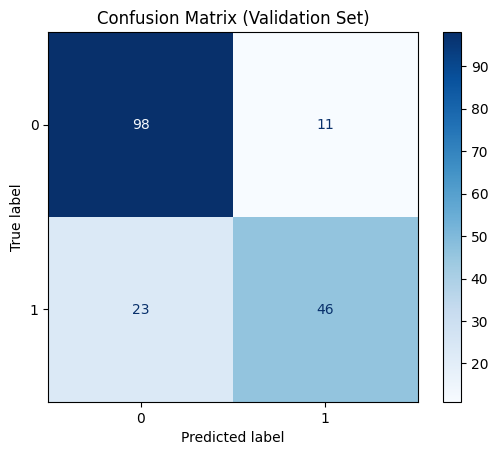

In [451]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.grid(False)
plt.show()

**혼동 행렬 해석**
* 정확도 = (46+98) / (98+11+23+46) = 0.809
* 정밀도 = 46 / (46+11) = 0.807
* 재현율 = 46 / (46+23) = 0.667
* F1-score = 0.731

전반적으로 나쁘지 않은 성능이라 할 수 있겠으나 재현율 66.7%로 실제 생존자를 놓치는 비율이 다소 존재한다는 점을 확인할 수 있다. 생존자(1)를 좀 더 잘 잡도록 개선할 필요가 있어 보인다.

In [452]:
# 테스트 데이터 예측
test_pred = rf.predict(test_df)

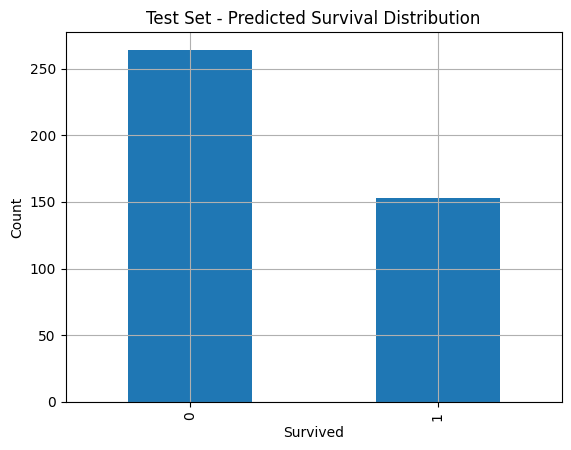

In [453]:
# 예측 분포 바 차트
pd.Series(test_pred).value_counts().sort_index().plot(kind='bar')
plt.title("Test Set - Predicted Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.grid(True)
plt.show()

**로지스틱회귀분석**

In [454]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_tr, y_tr)

# 검증 데이터로 예측
pred = model.predict(X_val)

In [455]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[93 16]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       109
           1       0.75      0.68      0.71        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.78       178



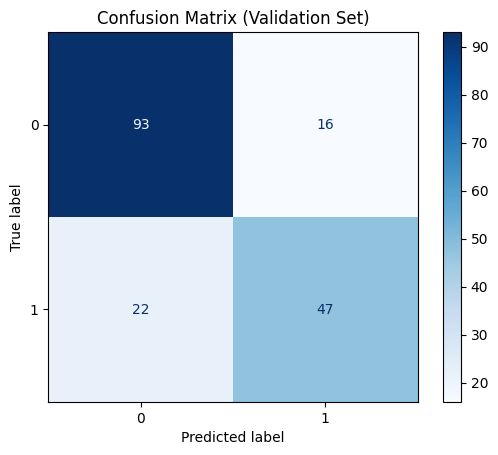

In [456]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.grid(False)
plt.show()


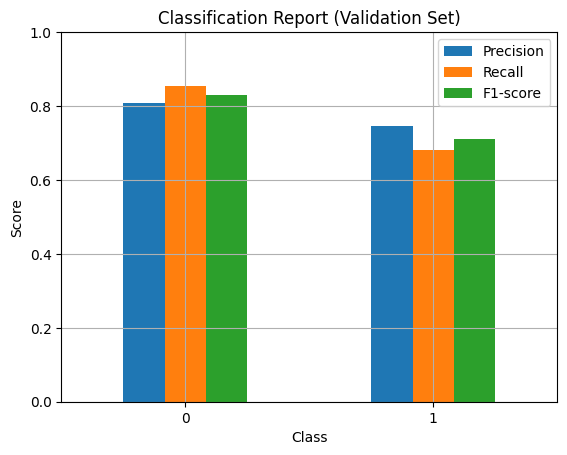

In [457]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

precision = precision_score(y_val, pred, average=None)
recall = recall_score(y_val, pred, average=None)
f1 = f1_score(y_val, pred, average=None)

df = pd.DataFrame({
    'Class': [0, 1],
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

df.set_index('Class').plot(kind='bar')
plt.title("Classification Report (Validation Set)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

생존자(1) 예측에서 Recall이 낮은 것으로 보아 실제 생존자인데 사망자로 잘못 예측한 경우가 있다는 것을 확인할 수 있다.